In [1]:
import sys
import os
sys.path.append(os.path.join('../src/detectron2/projects/DensePose/'))

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


from src.utils.results import open_pickle, compute_mean_mtx, plot_classification_report, mean_classification_report, read_classification_report


%matplotlib inline

In [17]:
import seaborn as sns
sns.set_context('paper', font_scale=2, 
                rc={'lines.linewidth': 2,
                    'text.usetex' : True,
                    'image.interpolation': 'nearest',
                    'image.cmap': 'gray',
                    'figure.figsize': (10.0, 8.0)})
sns.set_style(style='whitegrid')
sns.set_palette('colorblind', color_codes=True)

In [3]:
# from src.dataset.dataset import CLASSES # CEFET
from src.dataset.UFOP import classes # UFOP
# from src.dataset.MINDS import classes_en # MINDS


root_dir = '../results/random'
dataset = 'UFOP'
CLASSES = classes

all_cfn_mtx = open_pickle(os.path.join(root_dir, dataset, 'cfn_mtx_cat_all.pkl'))
all_cls_reports = open_pickle(os.path.join(root_dir, dataset, 'report_cat_all.pkl'))


In [4]:
mean_mtx, all_diags = compute_mean_mtx(all_cfn_mtx, normalize='true')

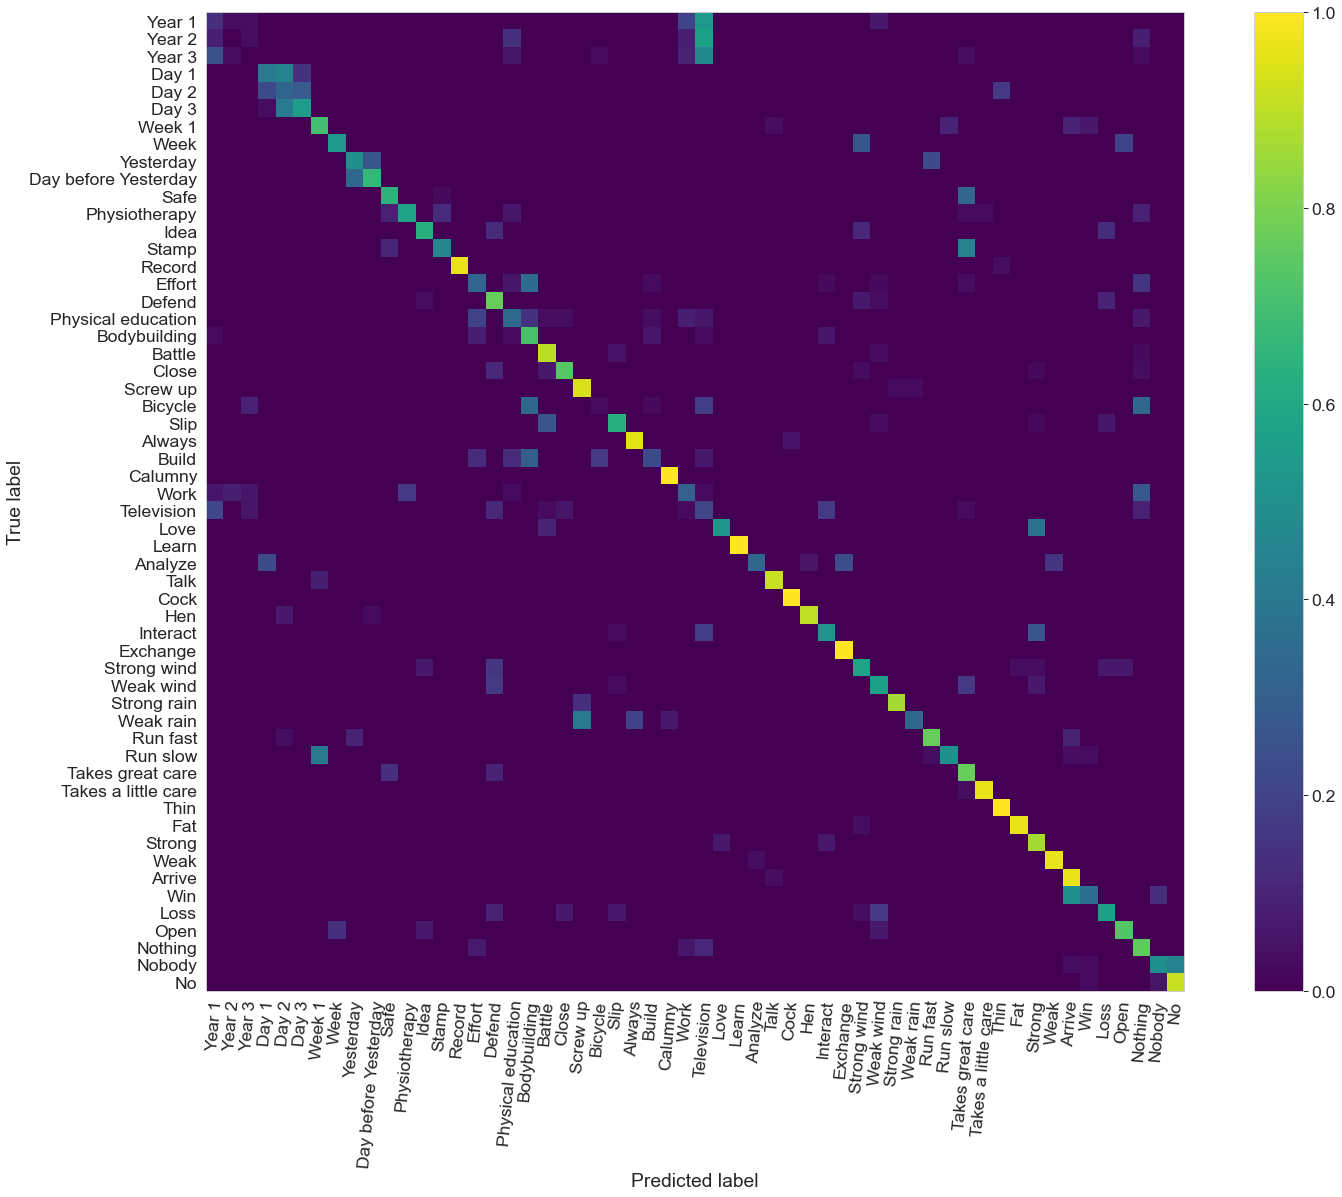

In [18]:
fig, ax = plt.subplots(figsize=(25,18))
ax.grid(False)
disp = ConfusionMatrixDisplay(mean_mtx, display_labels=CLASSES.values()) # for numbers labels=None
disp.plot(include_values=False, cmap='viridis', ax=ax, xticks_rotation=85)

plt.savefig(f"figs/cfnmtx_{dataset}.eps", bbox_inches='tight', pad_inches=0)
plt.show()

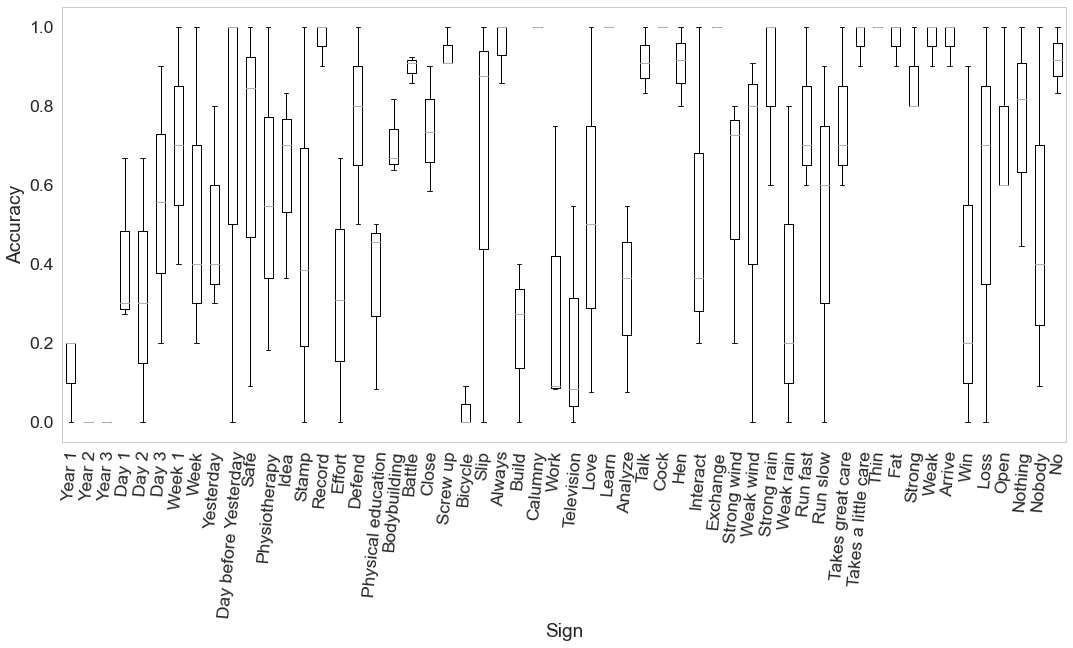

In [19]:
df = pd.DataFrame(all_diags, columns=CLASSES.values())
plt.figure(figsize=(18,8))
df.boxplot(grid=False, )
plt.ylabel('Accuracy')
plt.xticks(rotation=85, )
plt.xlabel('Sign')

ax = plt.gca()

plt.savefig(f"figs/boxplot_{dataset}.eps", bbox_inches='tight', pad_inches=0)


plt.show()

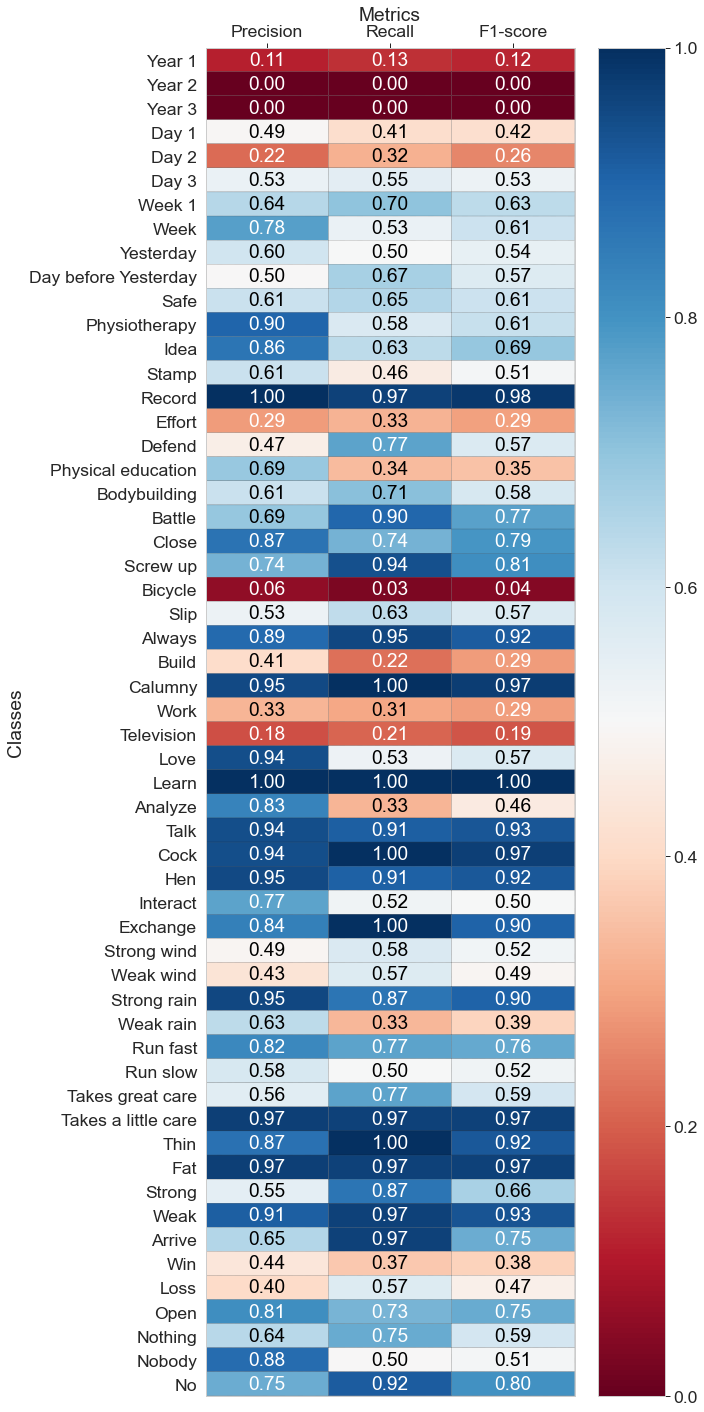

In [20]:
classes, Mat, support, class_names = read_classification_report(all_cls_reports['set_1'])
Mat_mean, Mat_std = mean_classification_report(all_cls_reports)

plot_classification_report(
    {'classes': None,
     'plotMat': Mat_mean,
     'support': support,
     'class_names':  list(CLASSES.values()),}, 
    figure_width=21, title='', correct_orientation=True)
plt.grid(False)
plt.savefig(f"figs/metrics_{dataset}.eps", bbox_inches='tight', pad_inches=0)